In [23]:
#Question 1
import pandas as pd
import numpy as np

def entropy(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  base = 2 if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

labels = [1,2,3,5,3,4,7]

print(entropy(labels))

2.5216406363433186


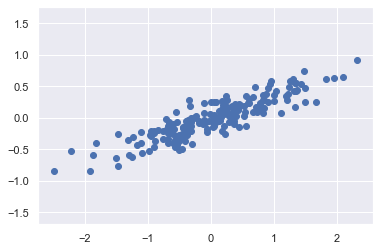

In [12]:
#Question 1B
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [15]:
#EigV
print(pca.explained_variance_)

[0.7625315 0.0184779]


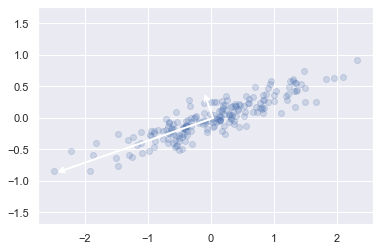

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [17]:
#Question 2
titanic = pd.read_csv('/Users/NBAndaru/Documents/UCG/Machine Learning - Biagi Andaru Codes/titanic.csv')
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# find how many missing data
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False) #number of missing data per column
    
    return pd.concat([Total] , axis = 1 , keys = ['Total'])
find_missing_data(titanic)

,Total
Cabin,687
Age,177
Embarked,2
Fare,0
Ticket,0
Parch,0
SibSp,0
Sex,0
Name,0
Pclass,0


In [19]:
#filling missing Age values
data = [titanic]

for dataset in data:
    mean = titanic["Age"].mean()
    std = titanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic["Age"].astype(int)
titanic["Age"].isnull().sum()

0

In [20]:
Sex = pd.Series(titanic['Sex'].replace(['female','male'],[int(0),int(1)]))
Age = titanic['Age']
Pclass = (titanic['Pclass'])
features = pd.concat([Sex, Pclass, Age], axis=1)
Y_train = titanic["Survived"]
X_train = features

In [21]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

X=features
y=titanic['Survived']
# X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier(criterion="entropy")
score6 = cross_val_score(clf, X, y, cv=6)
score8 = cross_val_score(clf, X, y, cv=8)

print('Scores cv = 6:', score6,'mean score:', score6.mean())
print('Scores cv = 8:', score8,'mean score:', score8.mean())

Scores cv = 6: [0.77181208 0.81208054 0.83892617 0.81081081 0.81081081 0.81081081] mean score: 0.8092085373964569
Scores cv = 8: [0.75       0.74107143 0.80357143 0.84821429 0.8125     0.82882883
 0.78181818 0.8       ] mean score: 0.7957505191880192
